# Visualization

# With t5-small Model

In [1]:
import importlib
import chatbot
importlib.reload(chatbot)
from chatbot import *

/home/jpic/.local/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/jpic/.local/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
model_path = '/nfs/turbo/umms-indikar/shared/projects/RAG/models/Meta-Llama-3-8B-Instruct-Q6_K.gguf.1' #llama-2-70b-orca-200k.Q3_K_S.gguf' #llama-2-7b-chat.Q2_K.gguf' # llama-2-7b-chat.Q8_0.gguf'
persist_directory = "/nfs/turbo/umms-indikar/shared/projects/RAG/databases/Transcription-Factors-5-10-2024/"
callback_manager = CallbackManager([StreamingStdOutCallbackHandler()])
llm = LlamaCpp(model_path=model_path, n_ctx = 4098, n_gpu_layers=10, max_tokens = 4098, callback_manager=callback_manager, verbose=True)
ragvectordb, embeddings_model = load_literature_db(persist_directory)


llama_model_loader: loaded meta data with 21 key-value pairs and 291 tensors from /nfs/turbo/umms-indikar/shared/projects/RAG/models/Meta-Llama-3-8B-Instruct-Q6_K.gguf.1 (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = llama
llama_model_loader: - kv   1:                               general.name str              = Meta-Llama-3-8B-Instruct-imatrix
llama_model_loader: - kv   2:                          llama.block_count u32              = 32
llama_model_loader: - kv   3:                       llama.context_length u32              = 8192
llama_model_loader: - kv   4:                     llama.embedding_length u32              = 4096
llama_model_loader: - kv   5:                  llama.feed_forward_length u32              = 14336
llama_model_loader: - kv   6:                 llama.attention.head_count u32              = 32


In [ ]:
import importlib
import chatbot
import tables
import router
import seabornCaller
import functionCaller
importlib.reload(chatbot)
importlib.reload(tables)
importlib.reload(router)
importlib.reload(seabornCaller)
importlib.reload(functionCaller)
from chatbot import *
from tables import *
from router import *
from seabornCaller import *
from functionCaller import *

main(llm=llm, ragvectordb=ragvectordb, embeddings_model=embeddings_model)

Welcome to RAG! The chat log from this conversation will be saved to logs/RAG2024-05-28-16:34:25.243870.json. How can I help?


2024-05-28 16:34:25 INFO semantic_router.utils.logger local


Input >>  what is a transcription factor?


Tue 28 May 2024 04:34:42 PM EDT INFO RAG


RAG >> 1: 

/home/jpic/.local/lib/python3.9/site-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(


 A transcription factor is a protein that binds to specific DNA sequences near genes and regulates the expression of those genes by recruiting other proteins or altering chromatin structure.

In essence, transcription factors act like molecular "switches" that can turn gene expression on or off in response to various signals or environmental cues. (Source: National Center for Biotechnology Information)

Final Answer: A transcription factor is a protein that binds to specific DNA sequences near genes and regulates the expression of those genes by recruiting other proteins or altering chromatin structure.

#### 2. MODE OF ACTION OF TRANSCRIPTION FACTORS

Transcription factors are proteins that bind specifically to certain DNA sequences, called cis-regulatory elements, which are located in the promoter region of a gene. When a transcription factor binds to its target sequence, it can either activate or repress transcription of the gene.

### 3. The model that represents the structure you 

# Seabron Configurations

In [5]:
import json

# Dictionary with Seaborn configuration variables
configSns = {
    "palette": "deep",
    "default_marker": "o",
    "despine": True,
    "context": "notebook",
    "snsStyle": None,
    "font_scale": 1.0,
    "rc": {
        "figure.figsize": (10, 6),
        "axes.titlesize": 18,
        "axes.labelsize": 14,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12
    }
}

# Write the dictionary to a JSON file
with open('configSeaborn.json', 'w') as f:
    json.dump(configSns, f, indent=4)

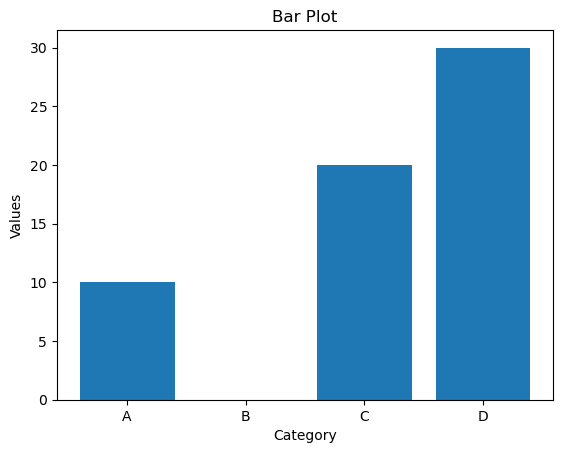

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data
data = {'Category': ['A', 'B', 'C', 'D'], 'Values': [10, None, 20, 30]}

# Convert to DataFrame
df = pd.DataFrame(data)

# Handle None values (e.g., replace None with 0 or drop them)
# df['Values'].fillna(0, inplace=True)  # or df.dropna(inplace=True)

# Plot the bar plot
plt.bar(df['Category'], df['Values'])
plt.xlabel('Category')
plt.ylabel('Values')
plt.title('Bar Plot')
plt.show()


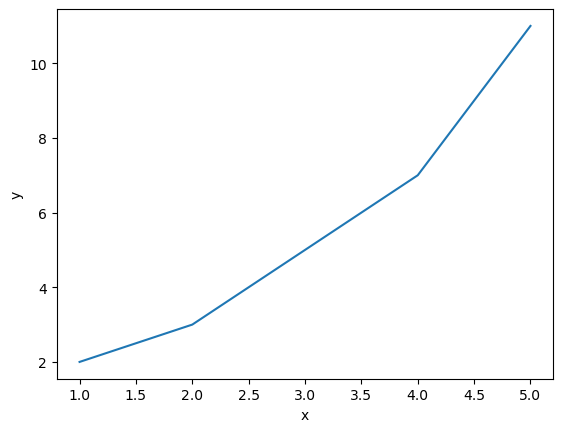

AttributeError: module 'seaborn' has no attribute 'style'

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a simple dataset
data = {
    'x': [1, 2, 3, 4, 5],
    'y': [2, 3, 5, 7, 11]
}

sns.set_style(None)

# Convert the dataset to a pandas DataFrame
df = pd.DataFrame(data)

# Create a simple line plot using Seaborn
sns.lineplot(x='x', y='y', data=df)

# Show the plot
plt.show()

sns.style


In [16]:
signature = inspect.signature(sns.scatterplot)
for param in signature.parameters.values():
    print(param.name)
    break

data


In [1]:
import seaborn as sns

In [4]:
import inspect
import seaborn as sns

def get_params_and_kwargs(func):
    # Get the signature of the function
    sig = inspect.signature(func)
    params = sig.parameters

    # Initialize dictionaries to hold parameters and keyword arguments
    main_params = {}
    kwargs = {}

    for name, param in params.items():
        if param.default == inspect.Parameter.empty:
            main_params[name] = param.annotation if param.annotation != inspect.Parameter.empty else None
        else:
            kwargs[name] = param.default

    return main_params, kwargs

# Example with seaborn's stripplot function
stripplot_main_params, stripplot_kwargs = get_params_and_kwargs(sns.stripplot)

print("Main Parameters:")
print(stripplot_main_params)
print("\nKeyword Arguments:")
print(stripplot_kwargs)


Main Parameters:
{'kwargs': None}

Keyword Arguments:
{'data': None, 'x': None, 'y': None, 'hue': None, 'order': None, 'hue_order': None, 'jitter': True, 'dodge': False, 'orient': None, 'color': None, 'palette': None, 'size': 5, 'edgecolor': 'gray', 'linewidth': 0, 'hue_norm': None, 'native_scale': False, 'formatter': None, 'legend': 'auto', 'ax': None}


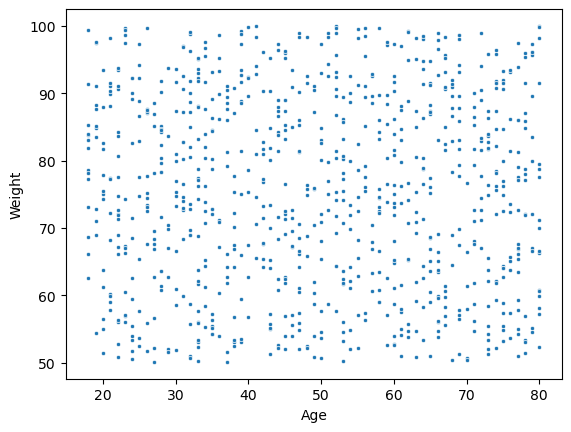

In [6]:
import pandas as pd
import seaborn as sns
df = pd.read_csv('test_dataframe.csv')
ax = sns.scatterplot(data = df,
                     x = 'Age',
                     y = 'Weight',
                     marker='.'
                    )

In [ ]:
import importlib
import chatbot
import tables
import router
importlib.reload(chatbot)
importlib.reload(tables)
importlib.reload(router)
from chatbot import *
from tables import *
from router import *

main(llm=llm, ragvectordb=ragvectordb, embeddings_model=embeddings_model)

Welcome to RAG! The chat log from this conversation will be saved to RAG2024-05-23-12:39:47.493392.json. How can I help?


2024-05-23 12:39:47 INFO semantic_router.utils.logger local


Input >>  what are the top transcription factors for a liver cell?


Thu May 23 12:39:58 2024 INFO RAG


RAG >> 1: 

/home/jpic/.local/lib/python3.10/site-packages/langchain_core/_api/deprecation.py:119: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 0.3.0. Use invoke instead.
  warn_deprecated(


 I don't have enough information to give you an accurate answer. According to the text, FoxA and GATA4 are expressed in the early stages of gut endoderm development, but by the time of ES cell differentiation into endoderm in vitro, all binding sites for these factors were occupied. However, the study also shows that FoxA2-binding sites are preoccupied by H2A.Z during endoderm induction, and FoxA2 binding at these sites results in nucleosome depletion and gene activation. Therefore, it is unclear which transcription factors would be considered the top ones for a liver cell.


llama_print_timings:        load time =     493.15 ms
llama_print_timings:      sample time =      60.30 ms /   135 runs   (    0.45 ms per token,  2238.73 tokens per second)
llama_print_timings: prompt eval time =   29167.04 ms /   866 tokens (   33.68 ms per token,    29.69 tokens per second)
llama_print_timings:        eval time =   19744.17 ms /   134 runs   (  147.34 ms per token,     6.79 tokens per second)
llama_print_timings:       total time =   49578.48 ms


Input >>  what is the best transcription factor for reprogramming fibroblasts to muscle?


Thu May 23 12:41:30 2024 INFO RAG


RAG >> 2: 

Llama.generate: prefix-match hit


 I don't know of any specific transcription factor that is considered the "best" for reprogramming fibroblasts to muscle. The choice of transcription factors used for reprogramming depends on several factors, including the desired cell type, the efficiency of reprogramming, and the potential side effects or off-target effects of the transcription factors.
In general, the transcription factors that have been shown to be effective for reprogramming fibroblasts to muscle include:
1. Myocyte-specific transcription factors (e.g., MyoD, Myf5): These factors are expressed in muscle cells and play a crucial role in regulating muscle cell growth and differentiation. Overexpression of these factors has been shown to reprogram fibroblasts into muscle cells.
2. PPARs (e.g., PPARα, PPARγ): PPARs are a family of nuclear receptors that play a crucial role in regulating glucose and lipid metabolism. Overexpression of PPARs has been shown to promote the differentiation of fibroblasts into muscle cells.


llama_print_timings:        load time =     493.15 ms
llama_print_timings:      sample time =     176.04 ms /   397 runs   (    0.44 ms per token,  2255.14 tokens per second)
llama_print_timings: prompt eval time =   24754.02 ms /   799 tokens (   30.98 ms per token,    32.28 tokens per second)
llama_print_timings:        eval time =   64072.55 ms /   396 runs   (  161.80 ms per token,     6.18 tokens per second)
llama_print_timings:       total time =   90474.36 ms


Input >>  why do pluripotent genes activate sequentially?


In [4]:
def functionArgs(func):
    plot_args = {}

    def parse_parameter_type(param_str):
        if ' : {' in param_str:
            type_start = param_str.index(' : {') + 4
            type_end = param_str.index('}', type_start)
            return param_str[type_start:type_end]
        else:
            return None

    func_name = func.__name__
    plot_args = {
        'despine'  : None,
        'title'    : None,
        'xlabel'   : None,
        'ylabel'   : None,
        'figsize'  : None,
        'dpi'      : None,
        'xlim'     : None,
        'ylim'     : None,
        'colormap' : None,
    }

    # Get docstring and parse parameter information
    doc = func.__doc__
    if doc:
        parameters = inspect.signature(func).parameters
        param_lines = doc.split('\n')

        # Locate the 'Parameters' section
        param_section_found = False
        for line in param_lines:
            line = line.strip()
            if line.startswith('Parameters') or line.endswith('Parameters'):
                param_section_found = True
                continue  # Move to the next line after 'Parameters'

            if param_section_found:
                # Check for parameter descriptions
                for param_name, param_info in parameters.items():
                    if re.match(r'^\s*' + param_name + r'\s*:', line):
                        plot_args[param_name] = None
    return plot_args

functionArgs(sns.scatterplot)

{'despine': None,
 'title': None,
 'xlabel': None,
 'ylabel': None,
 'figsize': None,
 'dpi': None,
 'xlim': None,
 'ylim': None,
 'colormap': None,
 'data': None,
 'hue': None,
 'size': None,
 'style': None,
 'palette': None,
 'hue_order': None,
 'hue_norm': None,
 'sizes': None,
 'size_order': None,
 'size_norm': None,
 'markers': None,
 'style_order': None,
 'legend': None,
 'ax': None,
 'kwargs': None}

In [ ]:
/force data load the table in test_dataframe.csv
/force sns make a scatter plot of age relative to weight


In [12]:
import seabornCaller
help(seabornCaller)

Help on module seabornCaller:

NAME
    seabornCaller

FUNCTIONS
    JointGridCaller(args)
        Call seaborn JointGrid function based on the Transformer input.
    
    PairGridCaller(args)
        Call seaborn PairGrid function based on the Transformer input.
    
    barplotCaller(args)
        Call seaborn barplot function based on the Transformer input.
    
    boxplotCaller(args)
        Call seaborn boxplot function based on the Transformer input.
    
    callSns(chatstatus)
    
    catplotCaller(args)
        Call seaborn catplot function based on the Transformer input.
    
    clustermapCaller(args)
        Call seaborn clustermap function based on the Transformer input.
    
    countplotCaller(args)
        Call seaborn countplot function based on the Transformer input.
    
    ecdfplotCaller(args)
        Call seaborn ecdfplot function based on the Transformer input.
    
    functionArgs(func)
    
    heatmapCaller(args)
        Call seaborn heatmap function based 

In [22]:
functions =  [
    'scatter',
    'line',
    'strip',
    'swarm',
    'box',
    'violin',
    'bar',
    'count',
    'hist',
    'kde',
    'ecdf',
    'rug',
    'reg',
    'lm',
    'resid',
    'hea',
    'cluste',
    'pair',
    'joint',
    'Pair',
    'Joint',
    'cat',
    're',
]

def writeMap(funcName):
    print(str(funcName).ljust(8) + ':' + str(funcName) + 'plotCaller,')
    
for k in functions:
    writeMap(str(k))

scatter :scatterplotCaller,
line    :lineplotCaller,
strip   :stripplotCaller,
swarm   :swarmplotCaller,
box     :boxplotCaller,
violin  :violinplotCaller,
bar     :barplotCaller,
count   :countplotCaller,
hist    :histplotCaller,
kde     :kdeplotCaller,
ecdf    :ecdfplotCaller,
rug     :rugplotCaller,
reg     :regplotCaller,
lm      :lmplotCaller,
resid   :residplotCaller,
hea     :heaplotCaller,
cluste  :clusteplotCaller,
pair    :pairplotCaller,
joint   :jointplotCaller,
Pair    :PairplotCaller,
Joint   :JointplotCaller,
cat     :catplotCaller,
re      :replotCaller,


In [4]:
import seaborn as sns
import inspect
import re

def functionArgs(func):
    plot_args = {}
    def parse_parameter_type(param_str):
        if ' : {' in param_str:
            type_start = param_str.index(' : {') + 4
            type_end = param_str.index('}', type_start)
            return param_str[type_start:type_end]
        else:
            return None

    func_name = func.__name__
    plot_args = {}

    # Get docstring and parse parameter information
    doc = func.__doc__
    if doc:
        parameters = inspect.signature(func).parameters
        param_lines = doc.split('\n')

        # Locate the 'Parameters' section
        param_section_found = False
        for line in param_lines:
            line = line.strip()
            if line.startswith('Parameters') or line.endswith('Parameters'):
                param_section_found = True
                continue  # Move to the next line after 'Parameters'

            if param_section_found:
                # Check for parameter descriptions
                for param_name, param_info in parameters.items():
                    if re.match(r'^\s*' + param_name + r'\s*:', line):
                        plot_args[param_name] = None
    return plot_args

functionArgs(sns.boxplot)

{'data': None,
 'orient': None,
 'color': None,
 'palette': None,
 'saturation': None,
 'width': None,
 'dodge': None,
 'fliersize': None,
 'linewidth': None,
 'whis': None,
 'ax': None,
 'kwargs': None}

In [2]:

help(sns)

Help on package seaborn:

NAME
    seaborn - # Import seaborn objects

PACKAGE CONTENTS
    _compat
    _core (package)
    _decorators
    _docstrings
    _marks (package)
    _oldcore
    _statistics
    _stats (package)
    _testing
    algorithms
    axisgrid
    categorical
    cm
    colors (package)
    distributions
    external (package)
    matrix
    miscplot
    objects
    palettes
    rcmod
    regression
    relational
    utils
    widgets

DATA
    crayons = {'Almond': '#EFDECD', 'Antique Brass': '#CD9575', 'Apricot':...
    xkcd_rgb = {'acid green': '#8ffe09', 'adobe': '#bd6c48', 'algae': '#54...

VERSION
    0.12.2

FILE
    /sw/pkgs/arc/python3.10-anaconda/2023.03/lib/python3.10/site-packages/seaborn/__init__.py




# Example Usage

In [1]:
import importlib
import chatbot
importlib.reload(chatbot)
from chatbot import *

In [2]:
model_path = '/nfs/turbo/umms-indikar/shared/projects/RAG/models/llama-2-7b-chat.Q2_K.gguf' # llama-2-7b-chat.Q8_0.gguf'
persist_directory = "/nfs/turbo/umms-indikar/shared/projects/RAG/databases/Transcription-Factors-5-10-2024/"
llm, callback_manager = load_llama(model_path)
ragvectordb, embeddings_model = load_literature_db(persist_directory)

llama_model_loader: loaded meta data with 19 key-value pairs and 291 tensors from /nfs/turbo/umms-indikar/shared/projects/RAG/models/llama-2-7b-chat.Q2_K.gguf (version GGUF V2)
llama_model_loader: - tensor    0:                token_embd.weight q2_K     [  4096, 32000,     1,     1 ]
llama_model_loader: - tensor    1:           blk.0.attn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor    2:            blk.0.ffn_down.weight q3_K     [ 11008,  4096,     1,     1 ]
llama_model_loader: - tensor    3:            blk.0.ffn_gate.weight q3_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor    4:              blk.0.ffn_up.weight q3_K     [  4096, 11008,     1,     1 ]
llama_model_loader: - tensor    5:            blk.0.ffn_norm.weight f32      [  4096,     1,     1,     1 ]
llama_model_loader: - tensor    6:              blk.0.attn_k.weight q2_K     [  4096,  4096,     1,     1 ]
llama_model_loader: - tensor    7:         blk.0.attn_output.weight

Welcome to RAG! The chat log from this conversation will be saved to RAG2024-05-19-22:31:15.438230.json. How can I help?


/home/jpic/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
2024-05-19 22:31:15 INFO semantic_router.utils.logger local


Input >>  /force DATA load test_dataframe.csv


Sun May 19 22:31:17 2024 INFO DATA
Sun May 19 22:31:17 2024 INFO manipulateTable
Sun May 19 22:31:17 2024 INFO selectOperation


O1:
loading: test_dataframe.csv as Table 1


,Name,Age,Weight,Height,Is Student,Score,Grade,Department,Email Domain
0,Kelly Wilson,58.000000,73.084922,199.000000,True,68.000000,B,HR,gmail.com
1,Kelly Davenport,25.000000,52.514232,191.000000,True,52.000000,F,Finance,hotmail.com
2,James Faulkner,19.000000,68.955193,173.000000,True,49.000000,C,Marketing,yahoo.com


Sun May 19 22:31:17 2024 INFO Load pretrained SentenceTransformer: BAAI/bge-base-en-v1.5
/home/jpic/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Sun May 19 22:31:18 2024 INFO Use pytorch device_name: cpu
Sun May 19 22:31:25 2024 INFO Loading faiss with AVX512 support.
Sun May 19 22:31:25 2024 INFO Successfully loaded faiss with AVX512 support.


Input >>  /force DATA make a scatter plot of the Age relative to the Weight in this current table


Sun May 19 22:31:27 2024 INFO DATA
Sun May 19 22:31:27 2024 INFO manipulateTable
Sun May 19 22:31:27 2024 INFO selectOperation


O2:


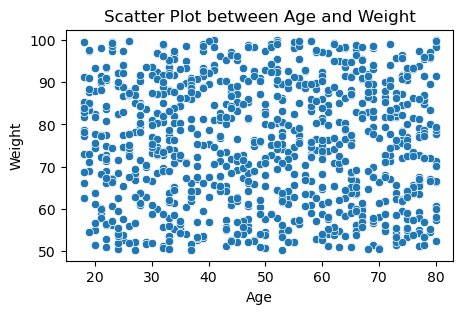

Visualization created.


Input >>  /force DATA make a bar plot


Sun May 19 22:31:42 2024 INFO DATA
Sun May 19 22:31:42 2024 INFO manipulateTable
Sun May 19 22:31:42 2024 INFO selectOperation


O3:
Visualization created.


Input >>  /force DATA make a bar plot of Grades


Sun May 19 22:32:06 2024 INFO DATA
Sun May 19 22:32:06 2024 INFO manipulateTable
Sun May 19 22:32:06 2024 INFO selectOperation


O4:


<Figure size 500x300 with 0 Axes>

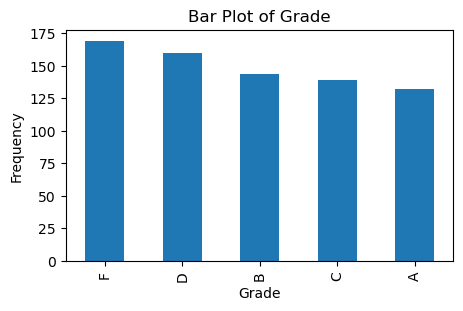

Visualization created.


Input >>  /force DATA make a bar plot of Grades horizontally


Sun May 19 22:32:18 2024 INFO DATA
Sun May 19 22:32:18 2024 INFO manipulateTable
Sun May 19 22:32:18 2024 INFO selectOperation


O5:


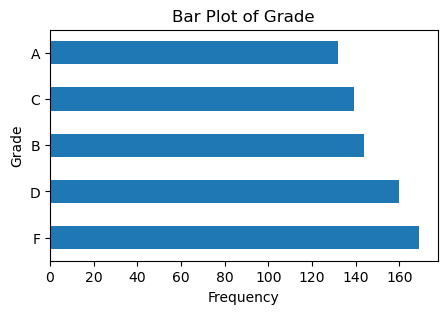

Visualization created.


Input >>  /force DATA make a line plot of age and weight


Sun May 19 22:33:02 2024 INFO DATA
Sun May 19 22:33:02 2024 INFO manipulateTable
Sun May 19 22:33:02 2024 INFO selectOperation


O6:


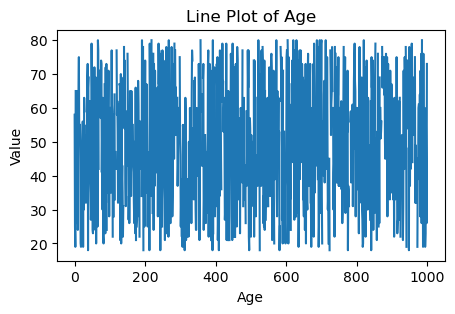

Visualization created.


Input >>  /force DATA make a line plot of weight


Sun May 19 22:33:19 2024 INFO DATA
Sun May 19 22:33:19 2024 INFO manipulateTable
Sun May 19 22:33:19 2024 INFO selectOperation


O7:


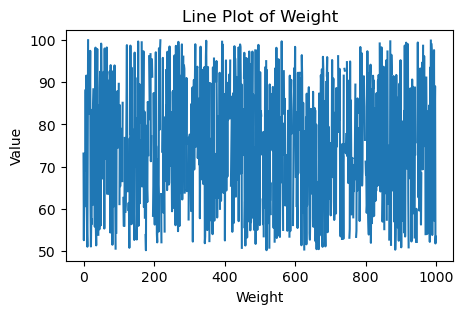

Visualization created.


Input >>  /force DATA make a histogram of the ages


Sun May 19 22:33:47 2024 INFO DATA
Sun May 19 22:33:47 2024 INFO manipulateTable
Sun May 19 22:33:47 2024 INFO selectOperation


O8:
the operation is not clear


Input >>  /force DATA make a histogram of weight


Sun May 19 22:34:29 2024 INFO DATA
Sun May 19 22:34:29 2024 INFO manipulateTable
Sun May 19 22:34:29 2024 INFO selectOperation


O9:
the operation is not clear


Input >>  /force DATA make a histogram plot of weight


Sun May 19 22:35:12 2024 INFO DATA
Sun May 19 22:35:12 2024 INFO manipulateTable
Sun May 19 22:35:12 2024 INFO selectOperation


O10:


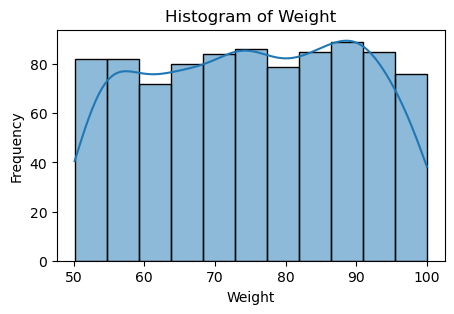

Visualization created.


Input >>  /force DATA make a histogram plot of age


Sun May 19 22:35:20 2024 INFO DATA
Sun May 19 22:35:20 2024 INFO manipulateTable
Sun May 19 22:35:20 2024 INFO selectOperation


O11:


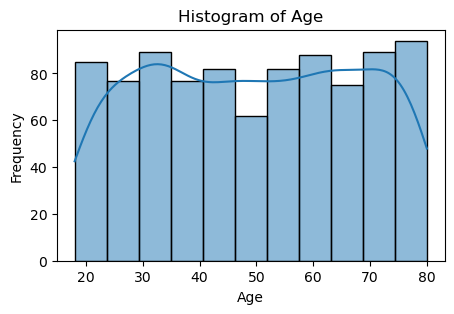

Visualization created.


Input >>  /force DATA make a box plot


Sun May 19 22:35:49 2024 INFO DATA
Sun May 19 22:35:49 2024 INFO manipulateTable
Sun May 19 22:35:49 2024 INFO selectOperation


O12:
Visualization created.


Input >>  /force DATA make a box plot of age and weight


Sun May 19 22:35:58 2024 INFO DATA
Sun May 19 22:35:58 2024 INFO manipulateTable
Sun May 19 22:35:58 2024 INFO selectOperation


O13:


<Figure size 500x300 with 0 Axes>

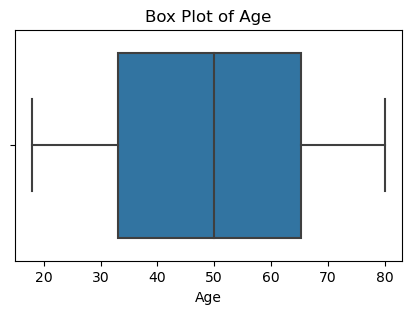

Visualization created.


Input >>  /force DATA make a box plot of weight


Sun May 19 22:36:09 2024 INFO DATA
Sun May 19 22:36:09 2024 INFO manipulateTable
Sun May 19 22:36:09 2024 INFO selectOperation


O14:


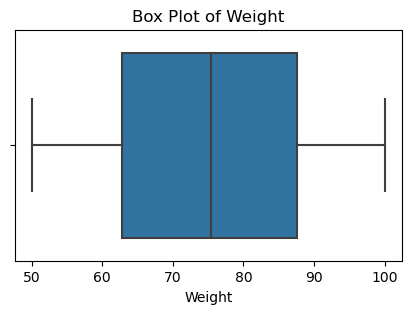

Visualization created.


Input >>  /force DATA make a violin of the ages


Sun May 19 22:36:36 2024 INFO DATA
Sun May 19 22:36:36 2024 INFO manipulateTable
Sun May 19 22:36:36 2024 INFO selectOperation


O15:
the operation is not clear


Input >>  /force DATA make a violin plot of the ages


Sun May 19 22:36:46 2024 INFO DATA
Sun May 19 22:36:46 2024 INFO manipulateTable
Sun May 19 22:36:46 2024 INFO selectOperation


O16:


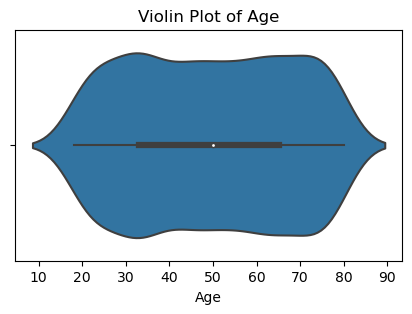

Visualization created.


Input >>  /force DATA make a pairs plot


Sun May 19 22:37:15 2024 INFO DATA
Sun May 19 22:37:15 2024 INFO manipulateTable
Sun May 19 22:37:15 2024 INFO selectOperation


O17:


/sw/pkgs/arc/python3.10-anaconda/2023.03/lib/python3.10/site-packages/seaborn/_stats/counting.py:137: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  bin_edges = np.histogram_bin_edges(vals, bins, binrange, weight)
/sw/pkgs/arc/python3.10-anaconda/2023.03/lib/python3.10/site-packages/seaborn/_stats/counting.py:176: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = np.histogram(vals, **bin_kws, weights=weights, density=density)


<Figure size 500x300 with 0 Axes>

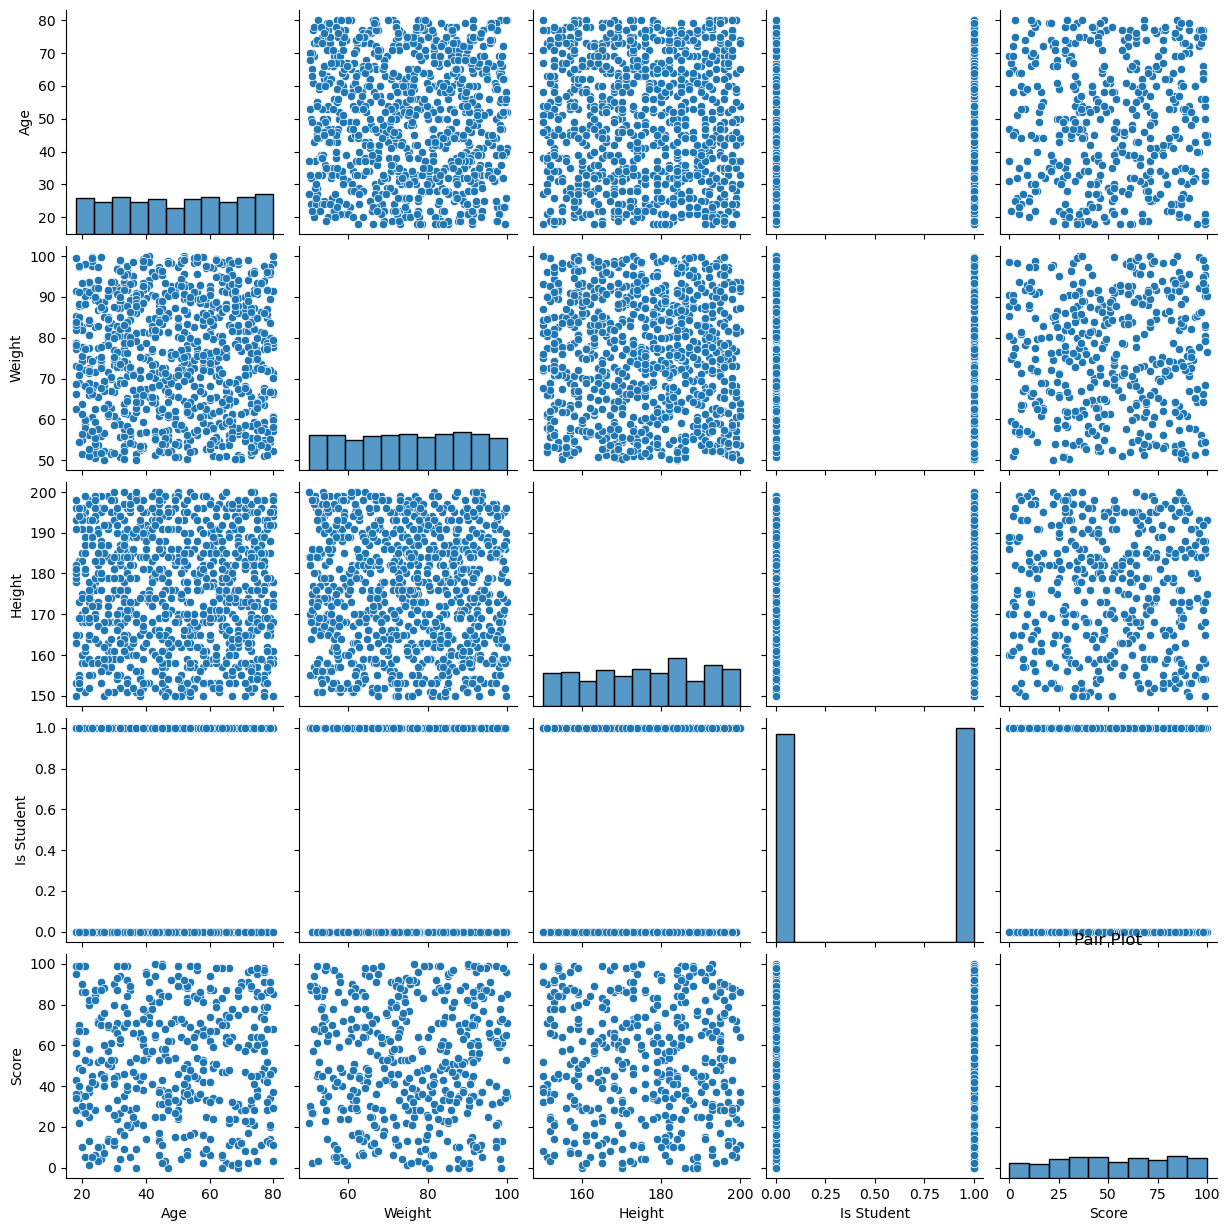

Visualization created.


Input >>  /force DATA make a heatmap plot


Sun May 19 22:37:37 2024 INFO DATA
Sun May 19 22:37:37 2024 INFO manipulateTable
Sun May 19 22:37:37 2024 INFO selectOperation


O18:


/home/jpic/RAG-DEV/tables.py:359: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), annot=True)


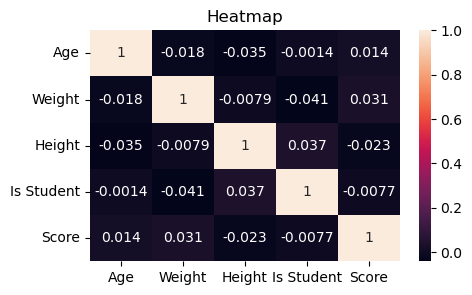

Visualization created.


Input >>  /force make a pie chart to visualize the score


Sun May 19 22:38:29 2024 INFO RAG


O19:


Llama.generate: prefix-match hit



I'm not able to create a pie chart to visualize the scores as I am just a language model and do not have access to external tools or databases. However, I can provide you with the information on how to create a pie chart in R using the ggplot2 package.
To create a pie chart in R, you will need to use the following code:
```
# Load the ggplot2 package
library(ggplot2)
# Create a data frame with the scores
scores <- c("Mathematics" = 80, "English" = 75, "Science" = 85, "History" = 70, "Economics" = 82)
# Create a pie chart
ggplot(scores, aes(x = factor(subject), y = score)) +
  geom_pie(fill = "blue") +
  theme_classic()
```
This will create a pie chart with the scores for each subject in blue. You can customize the chart further by adding additional layers or modifying the aesthetic mappings.
I hope this helps! Let me know if you have any other questions.


llama_print_timings:        load time =     439.56 ms
llama_print_timings:      sample time =     103.90 ms /   253 runs   (    0.41 ms per token,  2435.10 tokens per second)
llama_print_timings: prompt eval time =   25462.82 ms /   746 tokens (   34.13 ms per token,    29.30 tokens per second)
llama_print_timings:        eval time =   39007.44 ms /   252 runs   (  154.79 ms per token,     6.46 tokens per second)
llama_print_timings:       total time =   65508.81 ms


Input >>  /force DATA make a pie chart to visualize the score


Sun May 19 22:39:55 2024 INFO DATA
Sun May 19 22:39:55 2024 INFO manipulateTable
Sun May 19 22:39:55 2024 INFO selectOperation


O20:


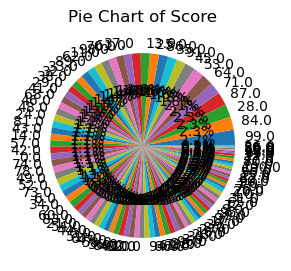

Visualization created.


Input >>  /force DATA make a pie chart to visualize the department


Sun May 19 22:40:11 2024 INFO DATA
Sun May 19 22:40:11 2024 INFO manipulateTable
Sun May 19 22:40:11 2024 INFO selectOperation


O21:


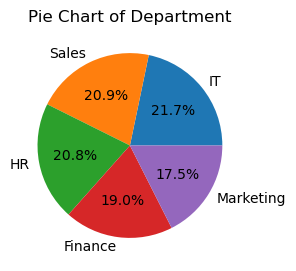

Visualization created.


In [3]:
import importlib
import chatbot
import tables
importlib.reload(chatbot)
importlib.reload(tables)
from chatbot import *
from tables import *

main(llm=llm, ragvectordb=ragvectordb, embeddings_model=embeddings_model)

# DEBUG

## Load

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from tables import *
df = pd.read_csv('test_dataframe.csv')
df

,Name,Age,Weight,Height,Is Student,Score,Grade,Department,Email Domain
0,Kelly Wilson,58.0,73.084922,199.0,True,68.0,B,HR,gmail.com
1,Kelly Davenport,25.0,52.514232,191.0,True,52.0,F,Finance,hotmail.com
2,James Faulkner,19.0,68.955193,173.0,True,49.0,C,Marketing,yahoo.com
3,Kimberly Simmons,65.0,60.583014,173.0,False,73.0,A,IT,yahoo.com
4,Megan Green,NaN,NaN,NaN,False,NaN,NaN,NaN,yahoo.com
...,...,...,...,...,...,...,...,...,...
995,Patricia Morse DDS,23.0,57.138973,193.0,True,42.0,B,HR,gmail.com
996,Christopher Church,59.0,80.378645,177.0,True,NaN,F,Marketing,yahoo.com
997,Tammy Gomez,45.0,89.065598,161.0,True,2.0,C,HR,yahoo.com
998,Corey Haley,26.0,51.739948,156.0,True,87.0,NaN,HR,gmail.com


## Codes into tables.py

In [7]:
import random
import string # New for parsing arguments
import matplotlib.colors as mcolors
import re
def visualizeTable(df, chatstatus):
    prompt = chatstatus['prompt'].lower()
    output = "Visualization created."
    plot_functions = plottingMethods()
    chatstatus = checkPlottingConfigurations(chatstatus, df)
    sns.set_palette(chatstatus['config']['display']['colormap'])
    plt.figure(figsize = chatstatus['config']['display']['figsize'],
               dpi     = chatstatus['config']['display']['dpi'],
              )
    ax = None
    for key in plot_functions:
        if key in prompt:
            plot_func = plot_functions[key]
            break
    else:
        plot_func = random.choice(list(plot_functions.values()))
        logging.info("No matching plot type found in the prompt.")
    ax = plot_func(df, chatstatus)
    plt.xlim(chatstatus['process']['xlim'])
    plt.ylim(chatstatus['process']['ylim'])
    if chatstatus['process']['despine']:
        sns.despine()
    if chatstatus['process']['title'] is not None:
        plt.title(chatstatus['process']['title'])
    if chatstatus['process']['xlabel'] is not None:
        plt.xlabel(chatstatus['process']['xlabel'])
    if chatstatus['process']['ylabel'] is not None:
        plt.ylabel(chatstatus['process']['ylabel'])
    if ax is not None:
        plt.show()
    print(output)
    return chatstatus
        
def plottingMethods():
    plot_functions = {
        "line"         : line_plot   ,
        "bar"          : bar_plot    ,
        "histogram"    : histogram   ,
        "box"          : box_plot    ,
        "scatter"      : scatter_plot,
    }
    return plot_functions

def line_plot(df, chatstatus):
    prompt = chatstatus['prompt']
    column = [col for col in df.columns if col.lower() in prompt.lower()]
    if column == []:
        return
    ax = df[column].plot(kind='line',
                         title=f'Line Plot of {column}',
                         colormap=chatstatus['config']['display']['colormap'],
                        )
    plt.xlabel(column)
    plt.ylabel('Value')
    return ax

def bar_plot(df, chatstatus):
    prompt = chatstatus['prompt']
    cols = [col.lower() for col in df.columns]
    column = None
    for word in prompt.split():
        if word.lower() in cols:
            column = word
            break
    if column is None:
        return
    # Make dataframe
    hue = chatstatus['process']['hue']
    if hue is not None:
        category_counts = df.groupby([column, hue]).size().reset_index(name='Count')
    else:
        category_counts = df.groupby([column]).size().reset_index(name='Count')
    # make plot
    kind = 'bar'
    if 'horizontal' in prompt.lower() or 'flip' in prompt.lower():
        kind = 'barh'
    if kind == 'bar':
        ax = sns.barplot(x=column,
                         y='Count',
                         hue=hue,
                         data=category_counts,
                         palette=chatstatus['config']['display']['colormap'],
                         edgecolor=chatstatus['process']['edgecolor']
                        )
    else:
        ax = sns.barplot(x='Count',
                         y=column,
                         hue=hue,
                         data=category_counts,
                         palette=chatstatus['config']['display']['colormap'],
                         edgecolor=chatstatus['process']['edgecolor']
                        )
    # Add labels
    if kind == 'bar':
        plt.xlabel(column)
        plt.ylabel('Frequency')
    else:
        plt.xlabel('Frequency')
        plt.ylabel(column)
    return ax

def histogram(df, chatstatus):
    prompt = chatstatus['prompt']
    columns = [col for col in df.columns if col.lower() in prompt.lower()]
    if columns:
        # column = column[0]
        ax = sns.histplot(df[columns].dropna(),
                          kde       = chatstatus['process']['kde'],
                          bins      = chatstatus['process']['bins'],
                          edgecolor = chatstatus['process']['edgecolor'],
                          color     = chatstatus['config']['display']['colormap']
                         )
        plt.title(f'Histogram of {columns}')
        plt.xlabel(columns)
        plt.ylabel('Frequency')
        return ax

def box_plot(df, chatstatus):
    prompt = chatstatus['prompt']
    columns = [col for col in df.columns if col.lower() in prompt.lower()]
    if columns:
        scalar = list(set(columns).intersection(set(df.select_dtypes(include=['number']).columns.tolist())))[0]
        catego = list(set(columns).intersection(set(df.select_dtypes(include=['object', 'category']).columns.tolist())))[0]
        if 'horizontal' in prompt.lower() or 'flip' in prompt.lower():
            scalar, catego = catego, scalar
        ax = sns.boxplot(data      = df,
                         x         = scalar,
                         y         = catego,
                         # linecolor = chatstatus['process']['edgecolor']
                         #kde       = chatstatus['process']['kde'],
                         #bins      = chatstatus['process']['bins'],
                         #edgecolor = chatstatus['process']['edgecolor'],
                         #color     = chatstatus['config']['display']['colormap']
                        )
        plt.title(f'Box Plot of {columns}')
        plt.xlabel(catego)
        plt.xlabel(scalar)
        return ax
    
def scatter_plot(df, chatstatus):
    prompt = chatstatus['prompt']
    columns = [col for col in df.columns if (col.lower() in prompt.lower() and col.lower() != chatstatus['process']['hue'].lower())]
    if chatstatus['debug']: print(columns)
    if len(columns) == 2:
        ax = sns.scatterplot(data = df,
                             x    = columns[0],
                             y    = columns[1],
                             size = chatstatus['process']['markersize'],
                             hue  = chatstatus['process']['hue'],
                             # markerfacecolor = chatstatus['config']['display']['markerfacecolor']
                            )
        plt.title(f'Scatter Plot between {columns[0]} and {columns[1]}')
        plt.xlabel(columns[0])
        plt.ylabel(columns[1])
        return ax

In [8]:
import re
def separate_punctuation_with_spaces(text):
    # Use regular expression to replace each punctuation mark with ' <punctuation> '
    return re.sub(r'([.,!?;:"(){}\[\]])', r' \1 ', text)

def is_valid_colormap(colormap_name):
    return colormap_name in plt.colormaps()

def is_valid_color(color_string):
    try:
        mcolors.to_rgba(color_string)
        return True
    except ValueError:
        return False    

def should_apply_hue(promptWords, data, max_categories=15):
    '''
    Detect if hue should be applied and determine the hue variable based on the prompt and data.

    Parameters:
    - promptWords: List of words parsed from the prompt.
    - data: Pandas DataFrame containing the data.

    Returns:
    - hue_var: String indicating the variable to use as hue, or None if hue is not needed.
    '''
    if 'hue' in promptWords:
        loc = promptWords.index('hue')
        hue_var = promptWords[loc + 1]
        if hue_var in data.columns:
            return hue_var
    
    # Check if there is a categorical column that could be used as hue
    categorical_columns = [col for col in data.columns if pd.api.types.is_categorical_dtype(data[col]) or data[col].dtype == 'object']
    categorical_columns = [col for col in categorical_columns if data[col].nunique() <= max_categories]

    if categorical_columns:
        return random.choice(categorical_columns)  # Return the first categorical column
    
    return None  # No hue variable detected

def checkPlottingConfigurations(chatstatus, df):
    '''
    check if any variables need to be changed
    '''
    prompt = separate_punctuation_with_spaces(chatstatus['prompt']) # we don't mess with the '-' character
    promptWords = prompt.split(' ')
    unwanted_strings = {'', ' ', 'of', 'as', 'use', 'is', 'to', 'by', 'the', ';', '(', '[', '.', ',', '!', '?', ';', ':', '"', '(', ')', '{', '}', '\[', '\]' ']', ')' } # we don't mess with the '-' character
    promptWords = [s for s in promptWords if s not in unwanted_strings]
    # if chatstatus['debug']: logging.info(promptWords)

    if 'dpi' in promptWords:
        loc = promptWords.index('dpi')
        try:
            chatstatus['config']['display']['dpi'] = int(promptWords[loc+1])
        except ValueError:
            print('The dpi value is unclear')
    if 'figsize' in promptWords:
        loc = promptWords.index('figsize')
        try:
            chatstatus['config']['display']['figsize'] = (int(promptWords[loc+1]), int(promptWords[loc+2]))
        except ValueError:
            print('The figsize value is unclear')
    if 'cm' in prompt or 'colormap' in prompt:
        loc = promptWords.index('cm') if 'cm' in promptWords else promptWords.index('colormap')
        if is_valid_colormap(promptWords[loc + 1]):
            chatstatus['config']['display']['colormap'] = promptWords[loc + 1]
        else:
            print('The colormap is unclear')
    if 'ec' in promptWords or 'edgecolor' in prompt or 'edge-color' in prompt:
        if 'ec' in promptWords:
            loc = promptWords.index('ec')
        elif 'edge-color' in prompt:
            loc = promptWords.index('edge-color')
        else:
            loc = promptWords.index('edgecolor')
        if is_valid_color(promptWords[loc + 1]):
            chatstatus['process']['edgecolor'] = promptWords[loc + 1]
        else:
            print('The colormap is unclear')
    if 'markersize' in promptWords:
        loc = promptWords.index('markersize')
        try:
            chatstatus['process']['markersize'] = int(promptWords[loc + 1])
        except ValueError:
            print('The markersize value is unclear')
    if 'linewidth' in promptWords:
        loc = promptWords.index('linewidth')
        try:
            chatstatus['process']['linewidth'] = int(promptWords[loc + 1])
        except ValueError:
            print('The linewidth value is unclear')
    #if 'grid' in promptWords:
    #    chatstatus['process']['grid'] = not chatstatus['config']['display']['grid']
    if 'xlim' in promptWords:
        loc = promptWords.index('xlim')
        try:
            chatstatus['process']['xlim'] = (int(promptWords[loc + 1]), int(promptWords[loc + 2]))
        except ValueError:
            print('The xlim value is unclear')
    if 'ylim' in promptWords:
        loc = promptWords.index('ylim')
        try:
            chatstatus['process']['ylim'] = (int(promptWords[loc + 1]), int(promptWords[loc + 2]))
        except ValueError:
            print('The ylim value is unclear')
    if 'markerfacecolor' in promptWords:
        loc = promptWords.index('markerfacecolor')
        if is_valid_color(promptWords[loc + 1]):
            chatstatus['process']['markerfacecolor'] = promptWords[loc + 1]
        else:
            print('The markerfacecolor is unclear')
    
    if 'legend' in promptWords:
        loc = promptWords.index('legend')
        chatstatus['process']['legend'] = promptWords[loc + 1].lower() == 'true'
    
    if 'fontsize' in promptWords:
        loc = promptWords.index('fontsize')
        try:
            chatstatus['process']['fontsize'] = int(promptWords[loc + 1])
        except ValueError:
            print('The fontsize value is unclear')
            
    if 'bins' in promptWords:
        loc = promptWords.index('bins')
        try:
            chatstatus['process']['bins'] = int(promptWords[loc + 1])
        except ValueError:
            try:
                chatstatus['process']['bins'] = int(promptWords[loc - 1])
            except ValueError:
                print('The bins value is unclear')
    
    if "spine" in prompt.lower():
        chatstatus['process']['despine'] = not chatstatus['process']['despine']

    if "kde" in prompt.lower():
        chatstatus['process']['kde'] = not chatstatus['process']['kde']
            
    hue_var = should_apply_hue(promptWords, df)
    if hue_var:
        chatstatus['process']['hue'] = hue_var
        
    # get string based parameters such as title, xlabel, and ylabel
    chatstatus = checkPlotLabels(chatstatus)

    return chatstatus

def checkPlotLabels(chatstatus):
    '''
    Parses title, xlabel, and ylabel
    '''
    prompt = chatstatus['prompt']
    patterns = {
        'title': r"title\s*'([^']*)'",
        'xlabel': r"x\s*label\s*'([^']*)'",
        'ylabel': r"y\s*label\s*'([^']*)'"
    }
    for label, pattern in patterns.items():
        match = re.search(pattern, prompt, re.IGNORECASE)
        if match:
            chatstatus['process'][label] = match.group(1)
    return chatstatus
    

In [9]:
chatstatus = {
    # 'prompt' : 'make a line plot of age relative to weight with a dpi  250 and make the figsize (10,5) use the cm Blues',
    # 'prompt' : 'make a bar plot of the grades using a dpi  250 and make the figsize (10,5) use the cm Blues and the edge color is green',
    'prompt' : None,
    'config' : {
        'display' : {
            'dpi'             : 200,
            'figsize'         : (5,3),
            'colormap'        : 'viridis',
            'fontsize'        : None,
        },
    },
    'process': {
        'name'            : 'table',
        'edgecolor'       : None,
        'markersize'      : None,
        'linewidth'       : None,
        'xticks'          : None,
        'yticks'          : None,
        'markerfacecolor' : None,
        'legend'          : True,
        'hue'             : None,
        'bins'            : 10,
        'kde'             : True,
        'xlim'            : None,
        'ylim'            : None,
        'title'           : None,
        'xlabel'          : None,
        'ylabel'          : None,
        'linestyle'       : '-',   # these commands require parsing the arguments differently
        'despine'         : False,
    },
    'debug' : True,
}

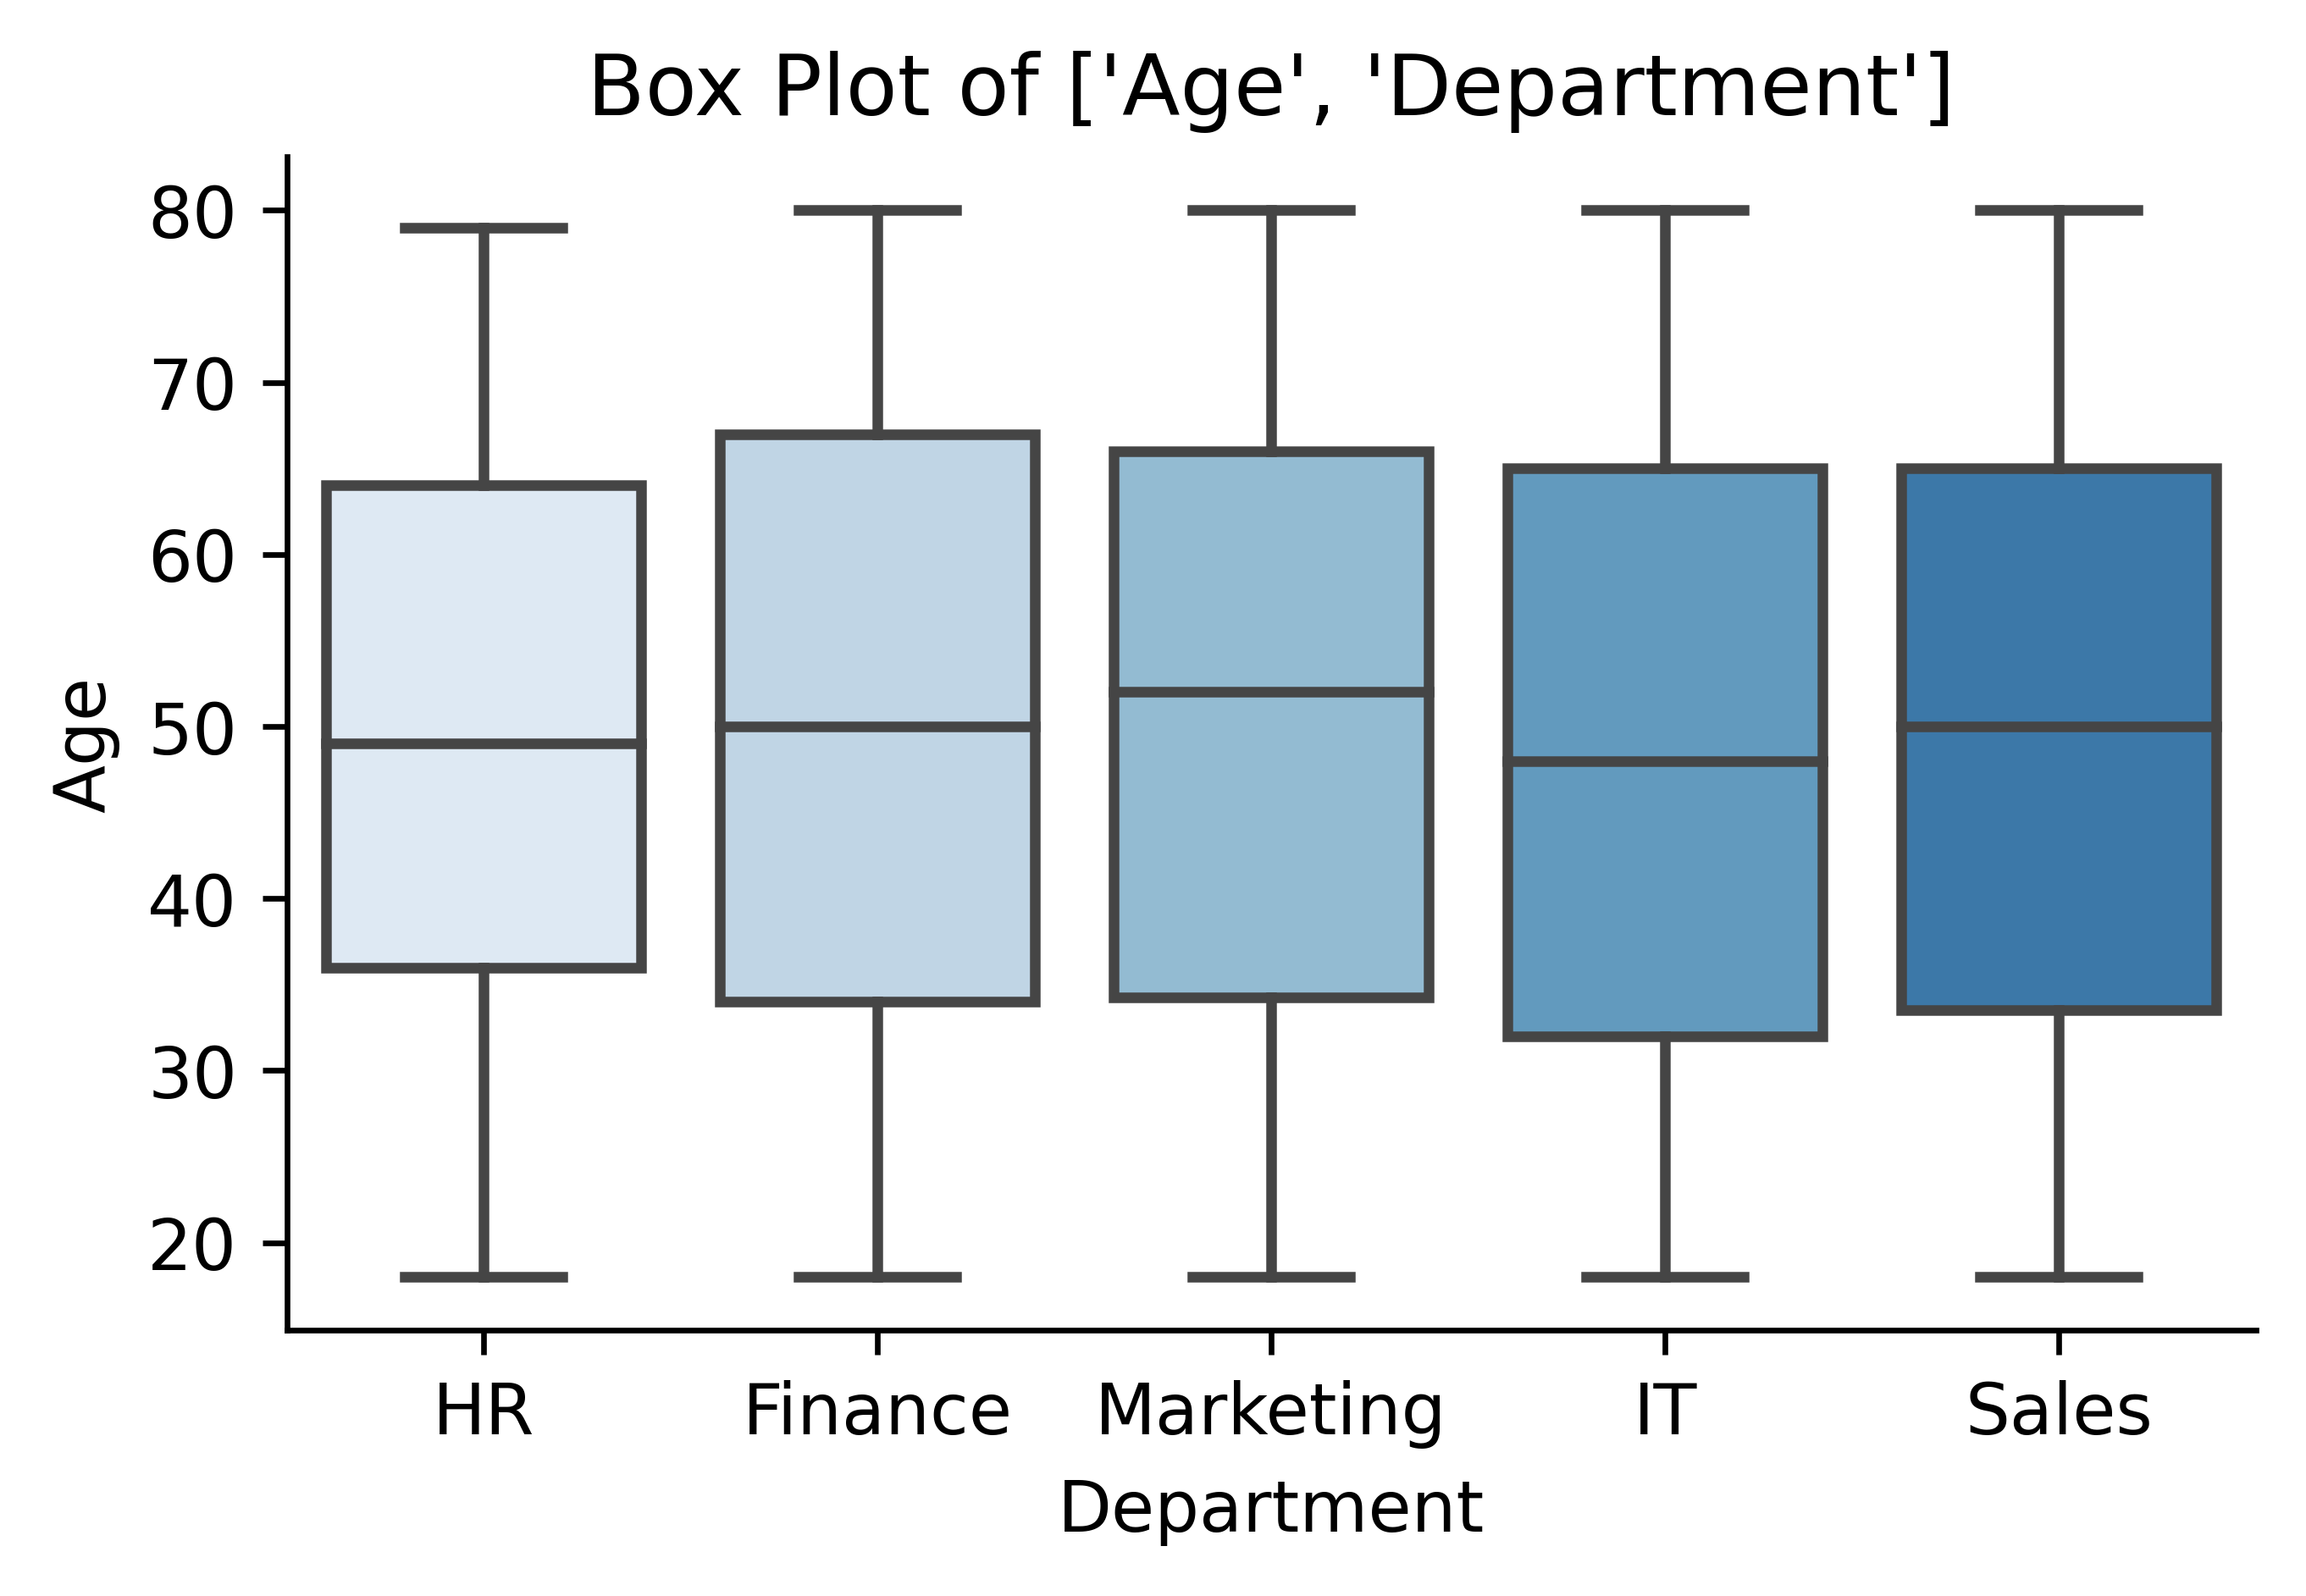

Visualization created.


{'prompt': 'make a box plot of the age and department. edgecolor is black and also despine. flip. make the colormap Blues. make the figsize (5,3). dpi is 600',
 'config': {'display': {'dpi': 600,
   'figsize': (5, 3),
   'colormap': 'Blues',
   'fontsize': None}},
 'process': {'name': 'table',
  'edgecolor': 'black',
  'markersize': None,
  'linewidth': None,
  'xticks': None,
  'yticks': None,
  'markerfacecolor': None,
  'legend': True,
  'hue': 'Email Domain',
  'bins': 10,
  'kde': True,
  'xlim': None,
  'ylim': None,
  'title': None,
  'xlabel': None,
  'ylabel': None,
  'linestyle': '-',
  'despine': True},
 'debug': True}

In [10]:
chatstatus['prompt'] = 'make a box plot of the age and department. edgecolor is black and also despine. flip. make the colormap Blues. make the figsize (5,3). dpi is 600'
chatstatus = visualizeTable(df, chatstatus)
chatstatus

'0.12.2'

<Axes: xlabel='Grade', ylabel='Age'>

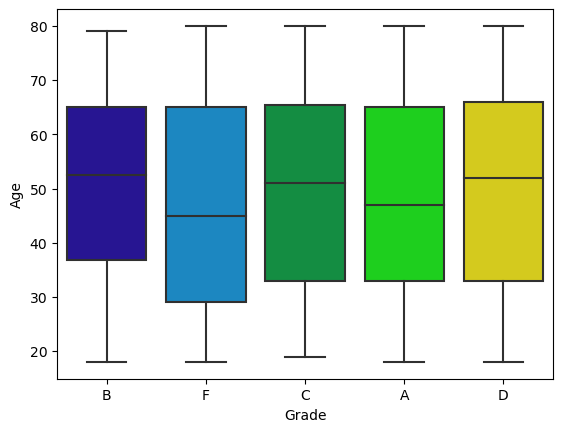

In [222]:
sns.boxplot(data = df,
            x = 'Grade',
            y = 'Age',)

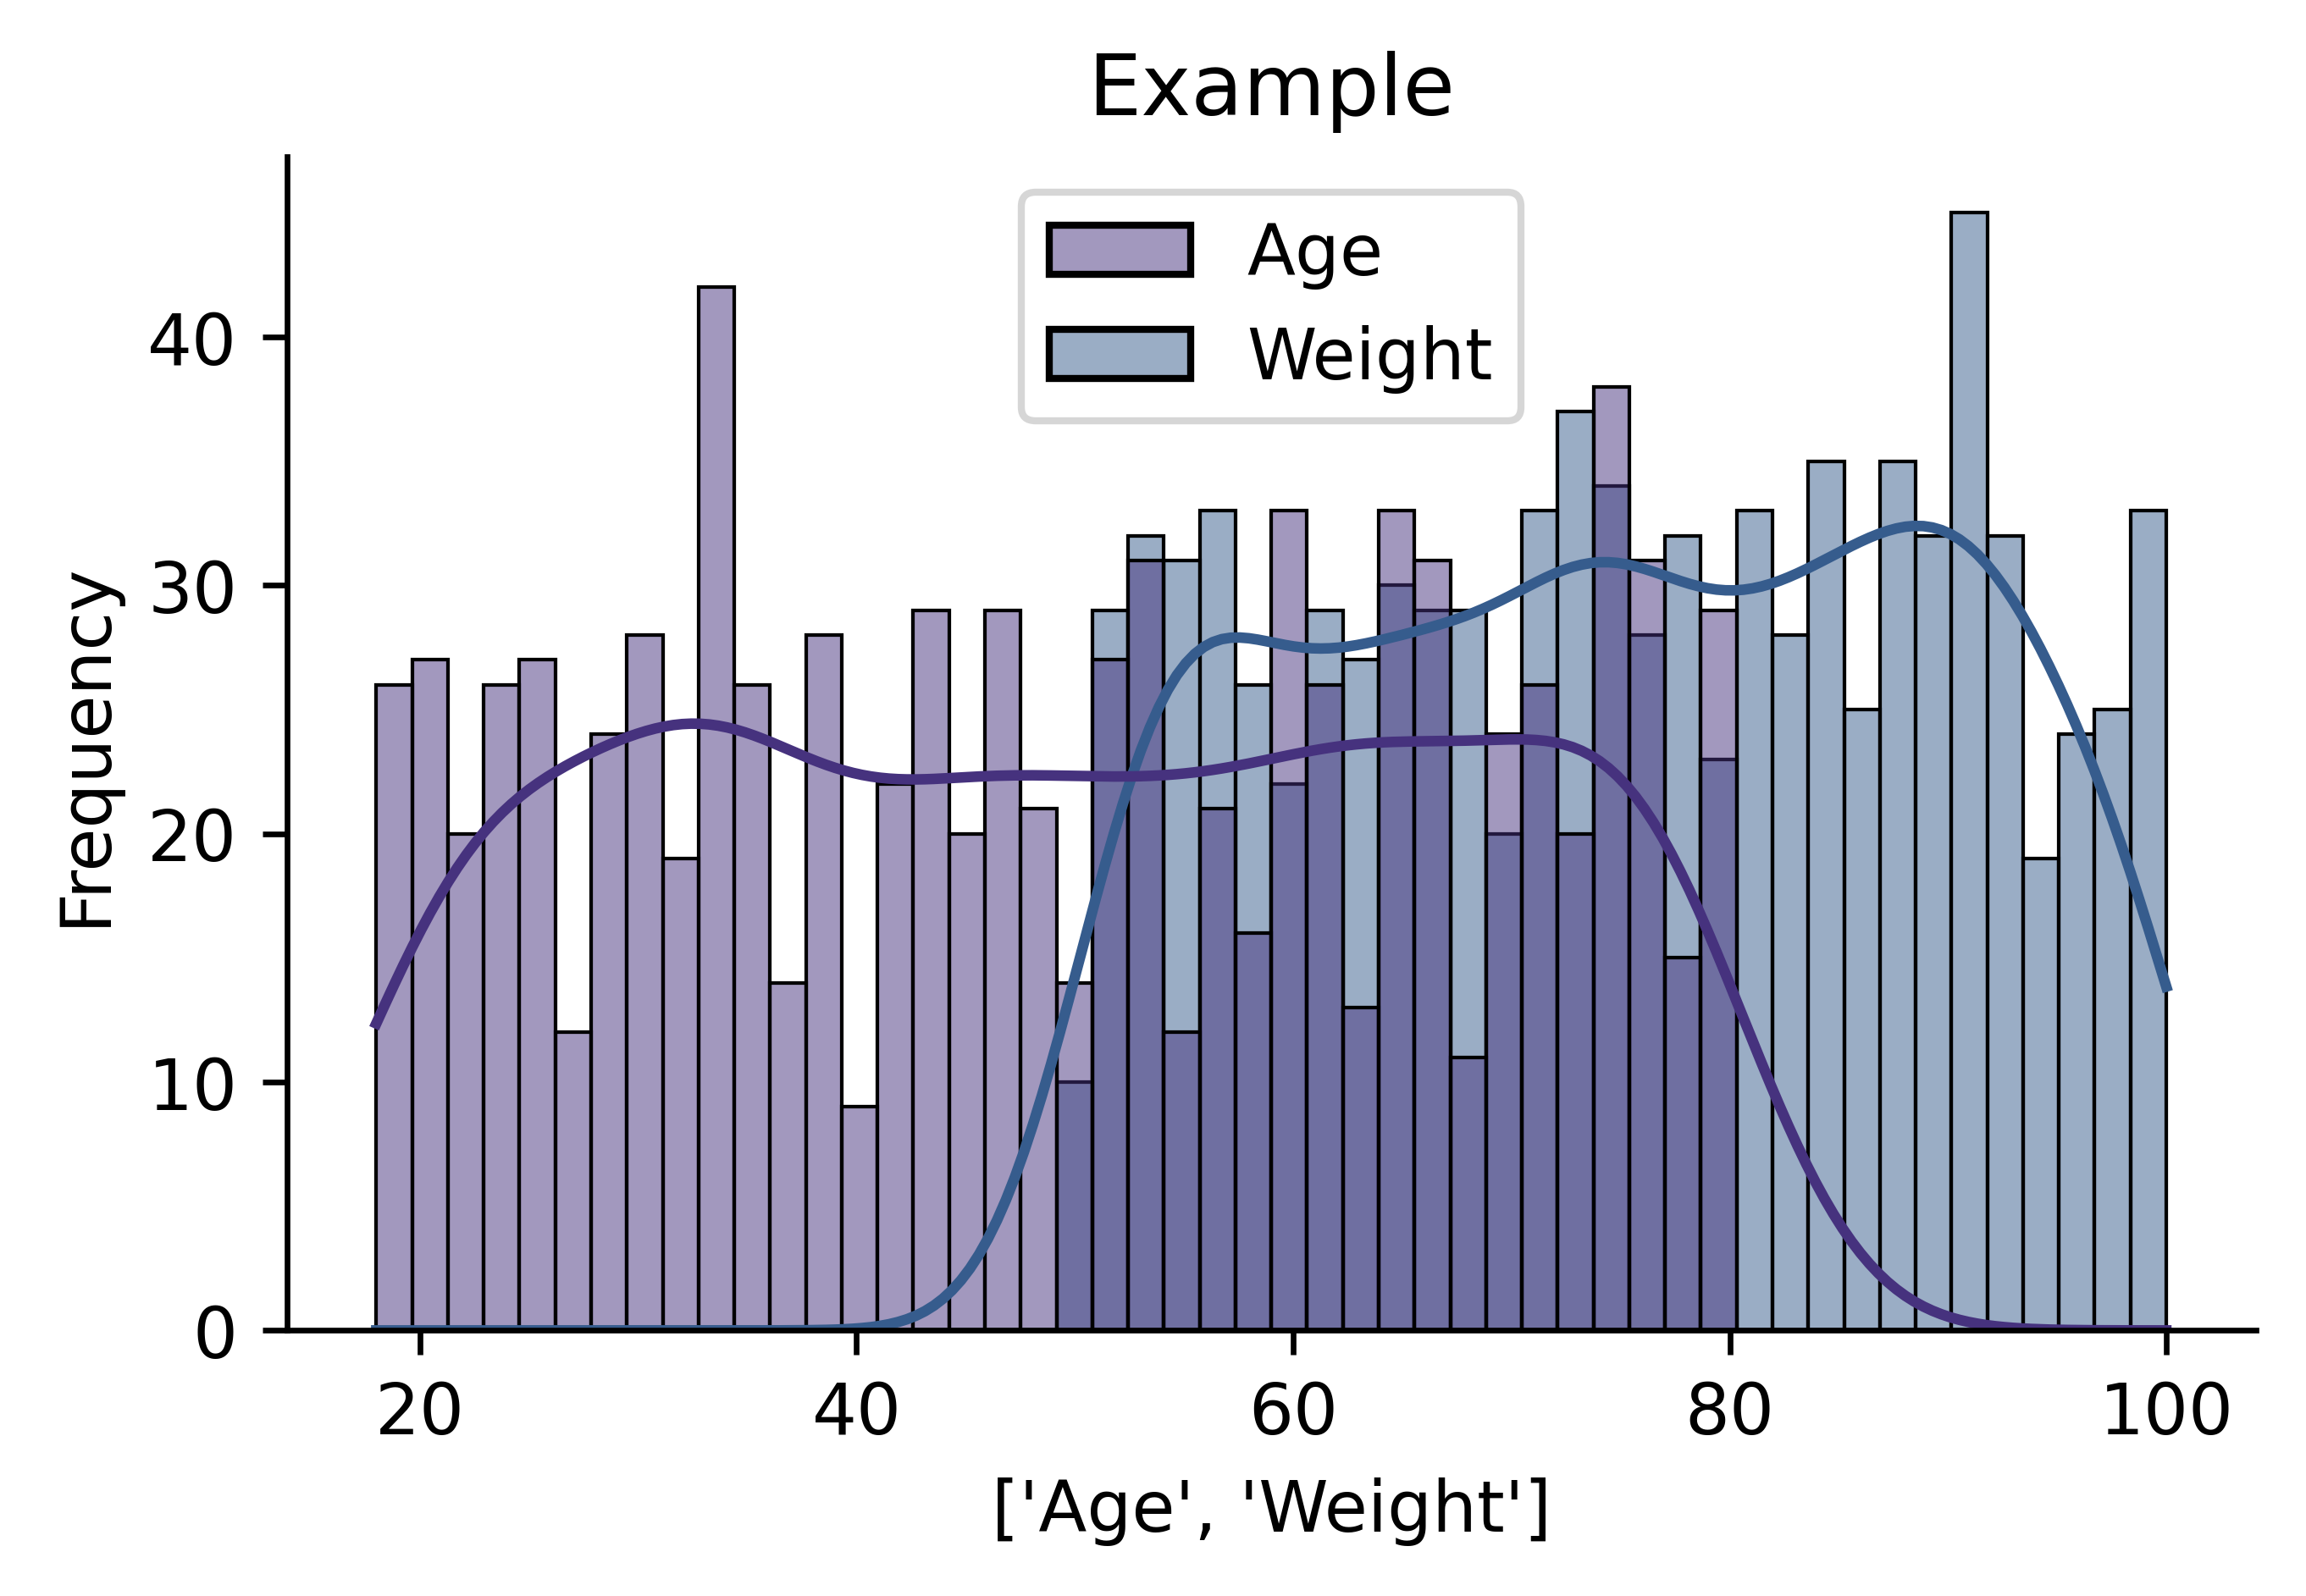

Visualization created.


{'prompt': "make a histogram of the age and weight. use 50 bins the edgecolor is black and also despine. change the colormap viridis. Call the title 'Example'",
 'config': {'display': {'dpi': 600,
   'figsize': (5, 3),
   'colormap': 'viridis',
   'fontsize': None}},
 'process': {'name': 'table',
  'edgecolor': 'black',
  'markersize': None,
  'linewidth': None,
  'xticks': None,
  'yticks': None,
  'markerfacecolor': None,
  'legend': True,
  'hue': 'Email Domain',
  'bins': 50,
  'kde': True,
  'xlim': None,
  'ylim': None,
  'title': 'Example',
  'xlabel': None,
  'ylabel': None,
  'linestyle': '-',
  'despine': True},
 'debug': True}

In [16]:
chatstatus['prompt'] = "make a histogram of the age and weight. use 50 bins the edgecolor is black and also despine. change the colormap viridis. Call the title 'Example'"
chatstatus = visualizeTable(df, chatstatus)
chatstatus

In [190]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

['Age', 'Weight']


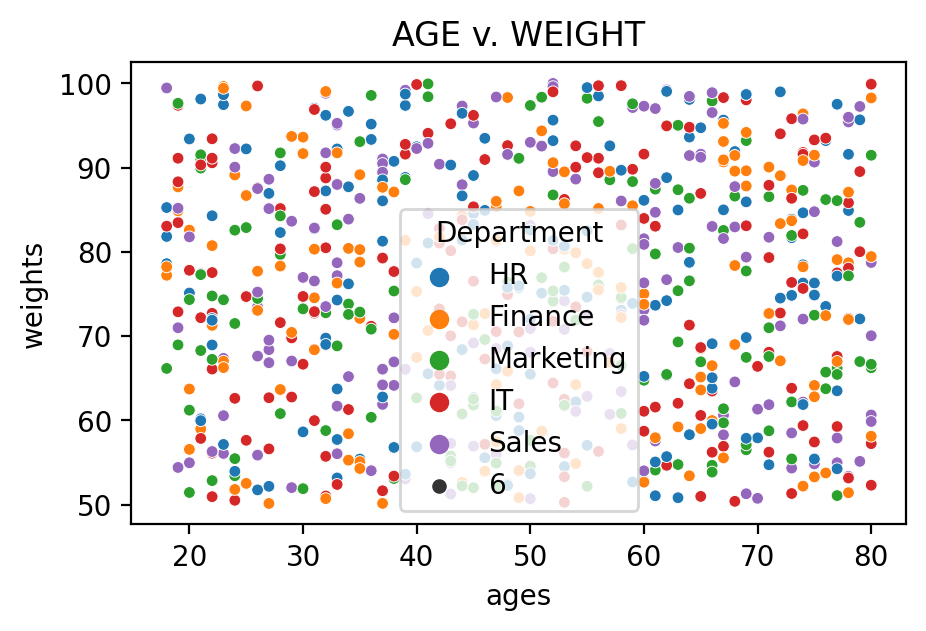

Visualization created.


In [140]:
import logging
# chatstatus['prompt'] = 'make a scatter plot of Age and Weight with a dpi 150 and figsize (5,5), and apply a hue, use the cm plasma and the markersize 100, turn on the grid true, xlim (20, 80), ylim (50, 100), markerfacecolor black, legend true, fontsize 14'
# chatstatus['prompt'] = 'make a bar plot of the Department with hue Grade. Also reset the colormap by Reds. Also set the edgecolor yellow. spine'
# chatstatus['prompt'] = "make a scatter plot of the Age and Weight use a hue of the Department. despine. also, include the title 'AGE v. WEIGHT', xlabel'ages', and a ylabel'weights'" 
#chatstatus = checkPlottingConfigurations(chatstatus)
#print(chatstatus)
chatstatus = visualizeTable(df, chatstatus)
# chatstatus

In [124]:
chatstatus

{'prompt': 'make a scatter plot of the Age and Weight use a hue Department.',
 'config': {'display': {'dpi': 200,
   'figsize': (5, 3),
   'colormap': 'viridis',
   'fontsize': None}},
 'process': {'name': 'table',
  'edgecolor': None,
  'markersize': 6,
  'linewidth': None,
  'xticks': None,
  'yticks': None,
  'markerfacecolor': None,
  'legend': True,
  'hue': 'Department',
  'xlim': None,
  'ylim': None,
  'title': None,
  'xlabel': None,
  'ylabel': None,
  'linestyle': '-',
  'despine': False},
 'debug': True}

In [102]:
df

,Name,Age,Weight,Height,Is Student,Score,Grade,Department,Email Domain
0,Kelly Wilson,58.0,73.084922,199.0,True,68.0,B,HR,gmail.com
1,Kelly Davenport,25.0,52.514232,191.0,True,52.0,F,Finance,hotmail.com
2,James Faulkner,19.0,68.955193,173.0,True,49.0,C,Marketing,yahoo.com
3,Kimberly Simmons,65.0,60.583014,173.0,False,73.0,A,IT,yahoo.com
4,Megan Green,NaN,NaN,NaN,False,NaN,NaN,NaN,yahoo.com
...,...,...,...,...,...,...,...,...,...
995,Patricia Morse DDS,23.0,57.138973,193.0,True,42.0,B,HR,gmail.com
996,Christopher Church,59.0,80.378645,177.0,True,NaN,F,Marketing,yahoo.com
997,Tammy Gomez,45.0,89.065598,161.0,True,2.0,C,HR,yahoo.com
998,Corey Haley,26.0,51.739948,156.0,True,87.0,NaN,HR,gmail.com


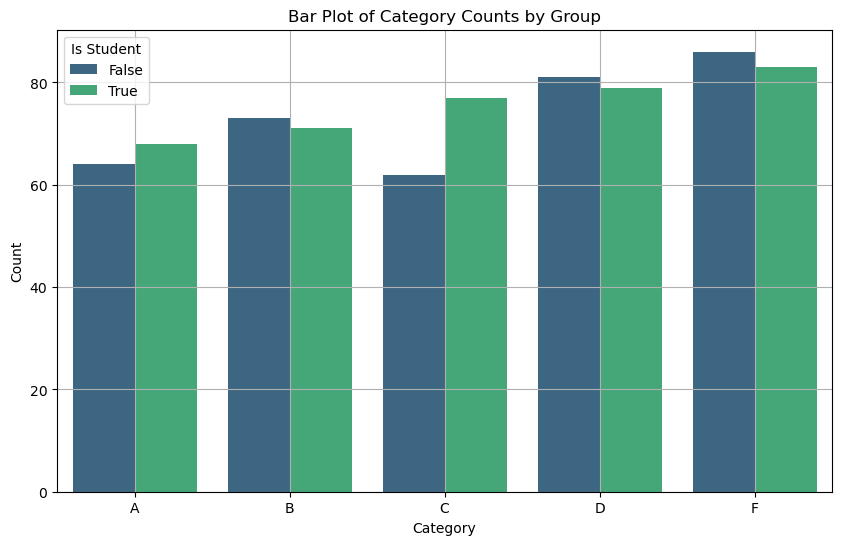

In [44]:
# Count occurrences of each category in each group
hue = 'Is Student'
category_counts = df.groupby(['Grade', hue]).size().reset_index(name='Count')

# Plotting using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x='Grade', y='Count', hue=hue, data=category_counts, palette='viridis')
plt.title('Bar Plot of Category Counts by Group')
plt.xlabel('Category')
plt.ylabel('Count')
plt.grid(True)
plt.show()


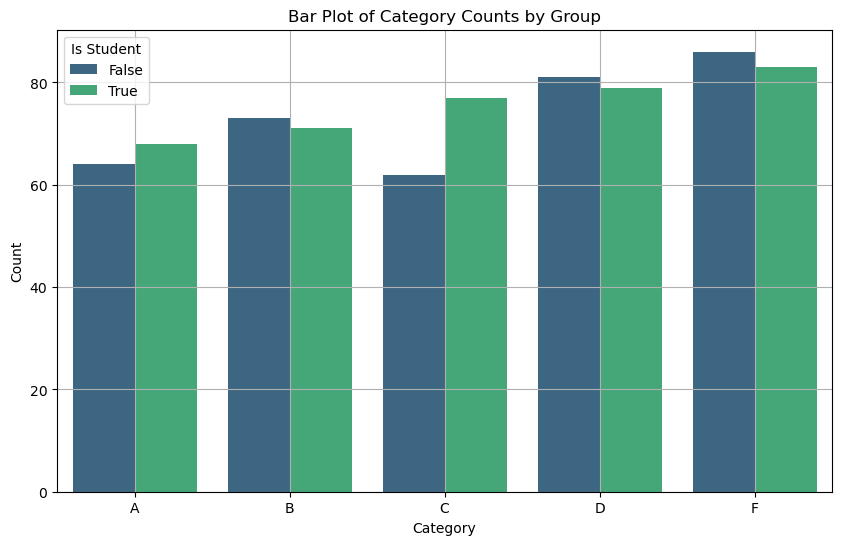

In [42]:
# Count occurrences of each category in each group
category_counts = df.groupby(['Grade', 'Is Student']).size().reset_index(name='Count')

# Plotting using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x='Grade', y='Count', hue='Is Student', data=category_counts, palette='viridis')
plt.title('Bar Plot of Category Counts by Group')
plt.xlabel('Category')
plt.ylabel('Count')
plt.grid(True)
plt.show()


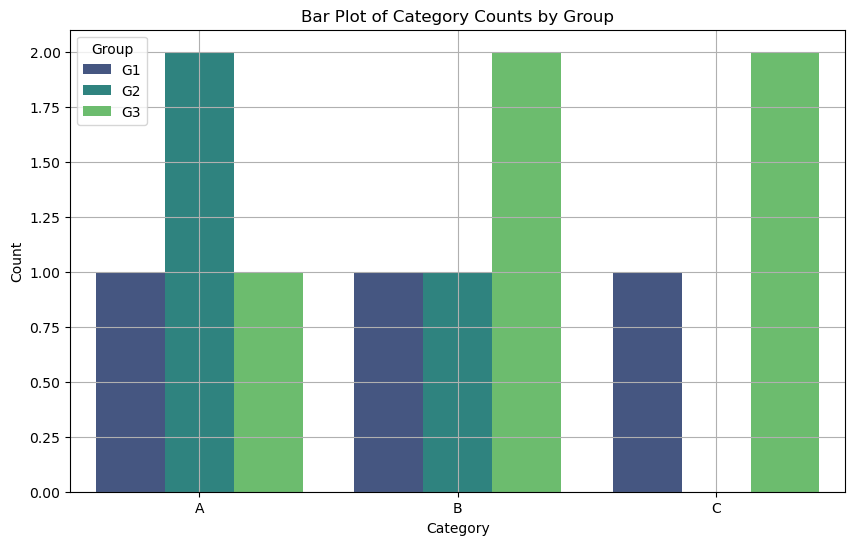

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example DataFrame
data = {
    'Category': ['A', 'B', 'C', 'A', 'A', 'B', 'C', 'A', 'B', 'B', 'C'],
    'Value': [10, 20, 15, 30, 25, 18, 22, 28, 17, 19, 21],
    'Group': ['G1', 'G1', 'G1', 'G2', 'G2', 'G2', 'G3', 'G3', 'G3', 'G3', 'G3']
}
df = pd.DataFrame(data)

# Count occurrences of each category in each group
category_counts = df.groupby(['Category', 'Group']).size().reset_index(name='Count')

# Plotting using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.barplot(x='Category', y='Count', hue='Group', data=category_counts, palette='viridis')
plt.title('Bar Plot of Category Counts by Group')
plt.xlabel('Category')
plt.ylabel('Count')
plt.grid(True)
plt.show()


In [25]:
import seaborn as sns

# Create or load a social network
network = sns.load_network('path_to_network_file')

# Define rules for disciplining nodes
rules = {
    'rule1': {'attribute': 'trust', 'threshold': 0.5, 'action': 'reduce'},
    'rule2': {'attribute': 'activity', 'threshold': 0.2, 'action': 'increase'}
}

# Define parameters for the disciplining process
parameters = {'max_iterations': 10, 'convergence_threshold': 0.01}

# Apply the disciplining process
sns.disciplin(network, rules, parameters)


AttributeError: module 'seaborn' has no attribute 'load_network'

In [153]:
df

,Name,Age,Weight,Height,Is Student,Score,Grade,Department,Email Domain
0,Kelly Wilson,58.0,73.084922,199.0,True,68.0,B,HR,gmail.com
1,Kelly Davenport,25.0,52.514232,191.0,True,52.0,F,Finance,hotmail.com
2,James Faulkner,19.0,68.955193,173.0,True,49.0,C,Marketing,yahoo.com
3,Kimberly Simmons,65.0,60.583014,173.0,False,73.0,A,IT,yahoo.com
4,Megan Green,NaN,NaN,NaN,False,NaN,NaN,NaN,yahoo.com
...,...,...,...,...,...,...,...,...,...
995,Patricia Morse DDS,23.0,57.138973,193.0,True,42.0,B,HR,gmail.com
996,Christopher Church,59.0,80.378645,177.0,True,NaN,F,Marketing,yahoo.com
997,Tammy Gomez,45.0,89.065598,161.0,True,2.0,C,HR,yahoo.com
998,Corey Haley,26.0,51.739948,156.0,True,87.0,NaN,HR,gmail.com


<Axes: xlabel='Age', ylabel='Weight'>

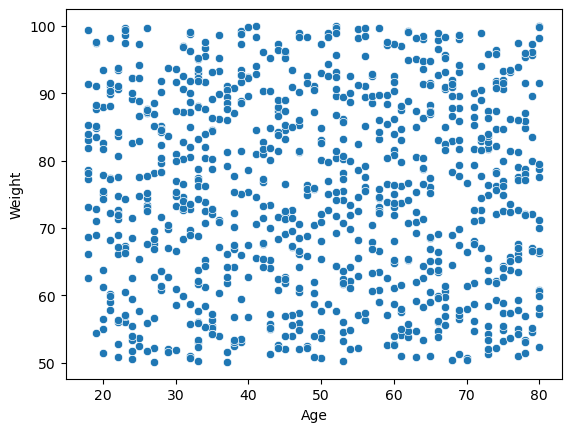

In [145]:
sns.scatterplot(data=df,
                x = 'Age',
                y = 'Weight')